In [1]:
#AA,Aa,aa
tab <- matrix(c(9,42,49,25,50,25),2,3,byrow=T)
rownames(tab) <- c("case","control")
colnames(tab) <- c("AA","Aa","aa")
tab

,AA,Aa,aa
case,9,42,49
control,25,50,25


In [15]:
cell11_can <- 0:min(sum(tab[1,]),sum(tab[,1]))
cell12_can <- 0:min(sum(tab[1,]),sum(tab[,2]))
cell_can <- expand.grid(cell11_can,cell12_can)
check_satis <- rep(NA,nrow(cell_can))
for(i in 1:nrow(cell_can)){
    tab_can <- matrix(NA,2,3)
    tab_can[1,1] <- cell_can[i,1]
    tab_can[1,2] <- cell_can[i,2]
    tab_can[1,3] <- sum(tab[1,]) - tab_can[1,1] - tab_can[1,2] #num of case is fixed
    tab_can[2,1] <- sum(tab[,1]) - tab_can[1,1] #num of AA is fixed
    tab_can[2,2] <- sum(tab[,2]) - tab_can[1,2] #num of Aa is fixed
    tab_can[2,3] <- sum(tab[,3]) - tab_can[1,3] #num of aa is fixed
    check_satis[i] <- all(tab_can>=0) & (sum(tab_can[2,])==sum(tab[2,]))
}

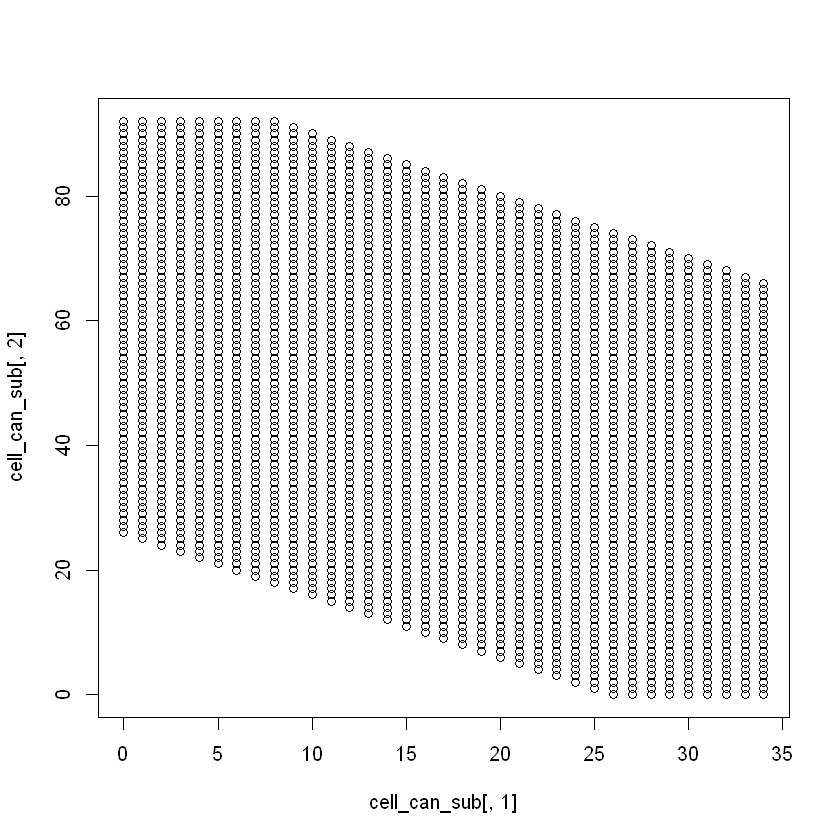

In [18]:
#Visualize all possible table
cell_can_sub <- cell_can[check_satis,]
plot(cell_can_sub[,1],cell_can_sub[,2])

In [58]:
#Additive model
res_p <- rep(NA,nrow(cell_can_sub))
res_p_dom <- rep(NA,nrow(cell_can_sub))
res_p_rec <- rep(NA,nrow(cell_can_sub))
for(i in 1:nrow(cell_can_sub)){
    tab_can <- matrix(NA,2,3)
    tab_can[1,1] <- cell_can_sub[i,1]
    tab_can[1,2] <- cell_can_sub[i,2]
    tab_can[1,3] <- sum(tab[1,]) - tab_can[1,1] - tab_can[1,2] #num of case is fixed
    tab_can[2,1] <- sum(tab[,1]) - tab_can[1,1] #num of AA is fixed
    tab_can[2,2] <- sum(tab[,2]) - tab_can[1,2] #num of Aa is fixed
    tab_can[2,3] <- sum(tab[,3]) - tab_can[1,3] #num of aa is fixed
    res_p[i] <- prop.trend.test(tab_can[1,],colSums(tab_can),c(0,1,2))$p.value
    res_p_dom[i] <- prop.trend.test(tab_can[1,],colSums(tab_can),c(0,1,1))$p.value
    res_p_rec[i] <- prop.trend.test(tab_can[1,],colSums(tab_can),c(0,0,1))$p.value
}

Warning message in anova.lm(lm(freq ~ score, data = list(freq = x/n, score = as.vector(score)), :
"ANOVA F-tests on an essentially perfect fit are unreliable"Warning message in anova.lm(lm(freq ~ score, data = list(freq = x/n, score = as.vector(score)), :
"ANOVA F-tests on an essentially perfect fit are unreliable"Warning message in anova.lm(lm(freq ~ score, data = list(freq = x/n, score = as.vector(score)), :
"ANOVA F-tests on an essentially perfect fit are unreliable"

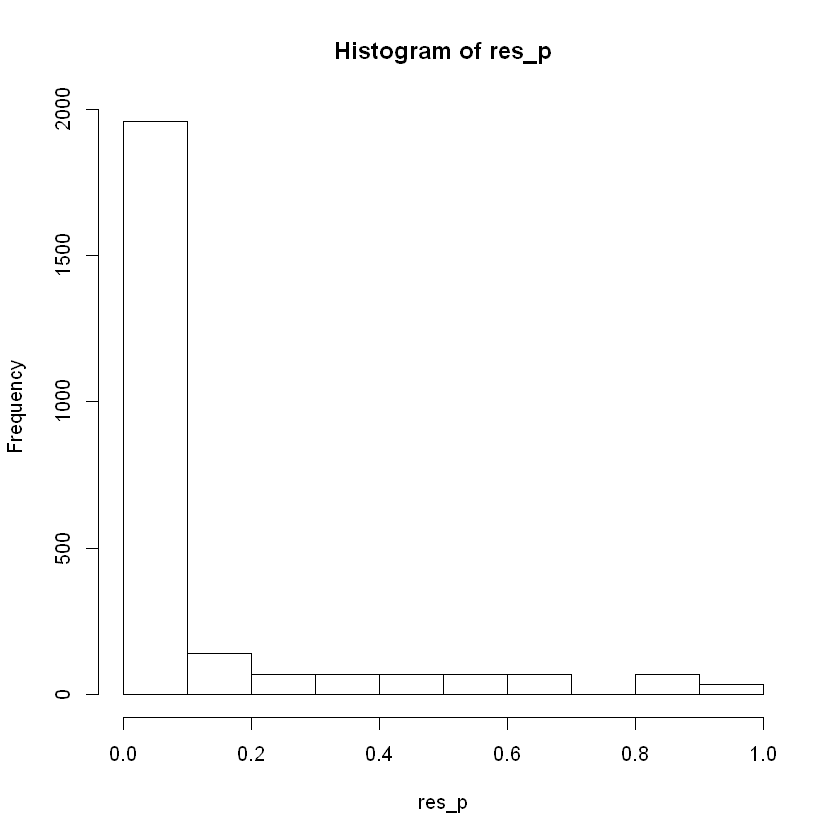

In [30]:
hist(res_p)

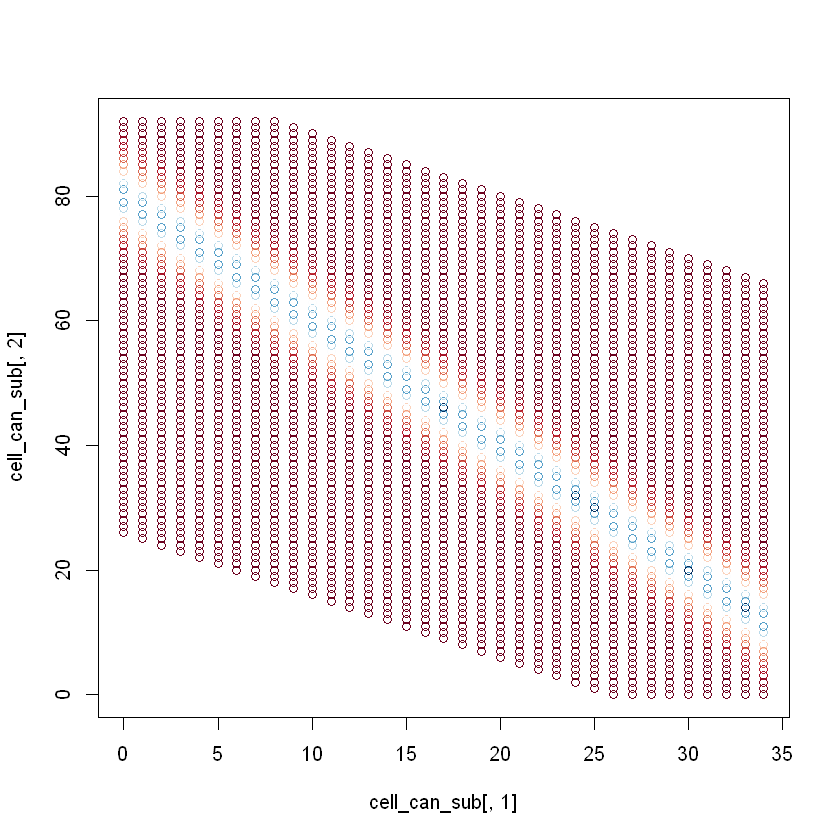

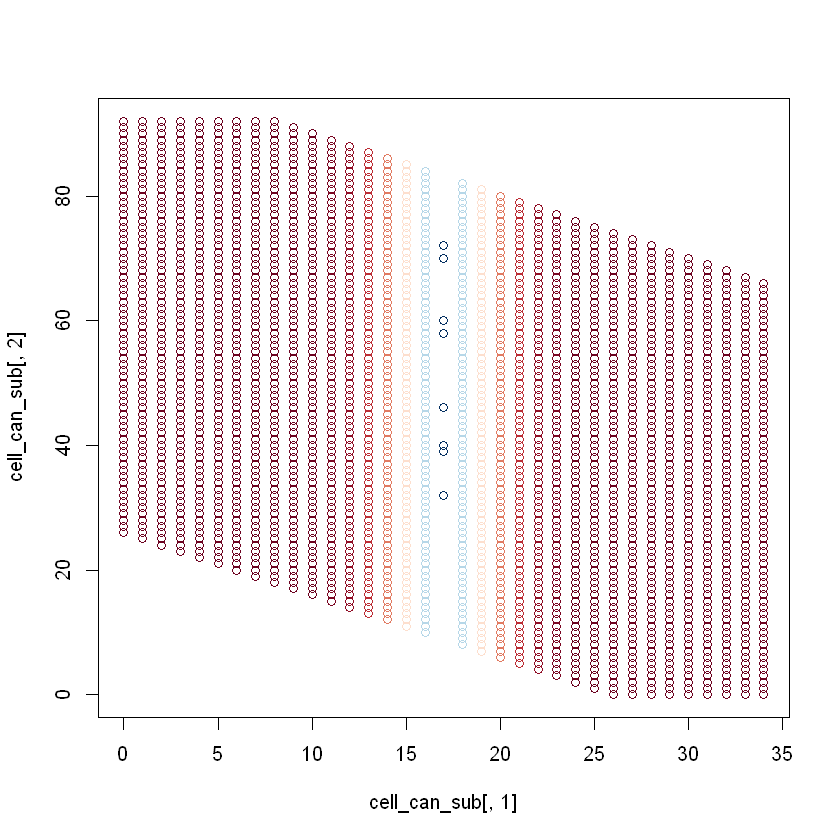

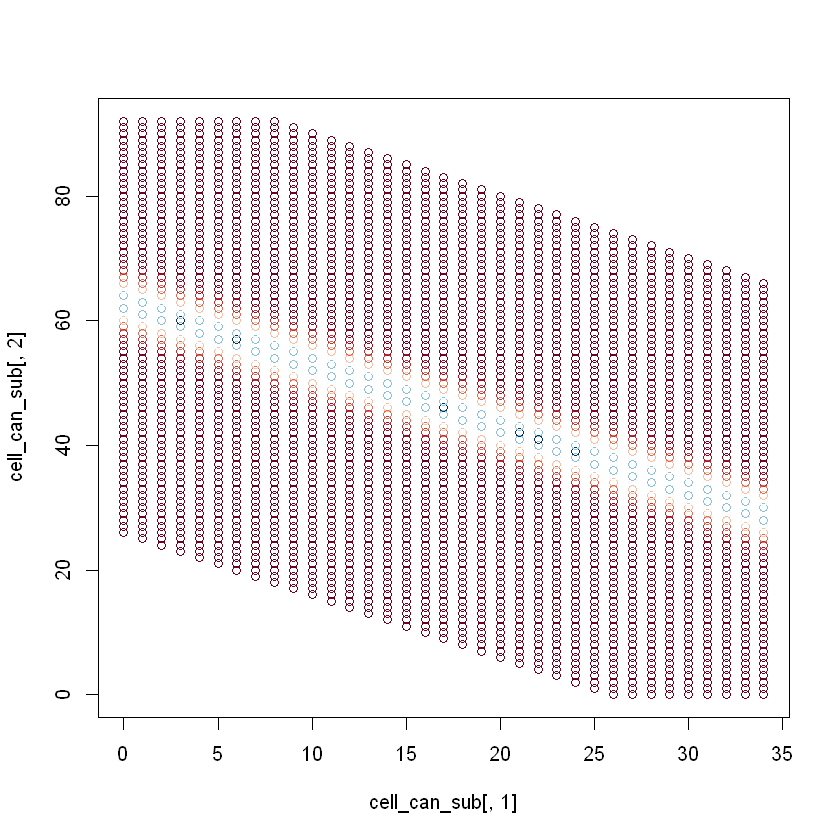

In [57]:
palette.breaks <- seq(0,1, length=100)
colorset <- c("#67001F", "#B2182B", "#D6604D", "#F4A582", "#FDDBC7","#FFFFFF", "#D1E5F0", "#92C5DE", "#4393C3","#053061")
colpal <- colorRampPalette(colorset)
color.palette <- colpal(length(palette.breaks) - 1)

#色を割り当てる関数
irowariate <- function(x){
  if(x < min(palette.breaks)){
    res <- color.palette[1]
  }else if(x < max(palette.breaks)){
    y = palette.breaks -x 
    res <- color.palette[which(y==min(y[y>0]))]
  }else{
    res <- color.palette[length(color.palette)]
  }
  return(res)
}

plot(cell_can_sub[,1],cell_can_sub[,2],col=sapply(res_p,irowariate))
plot(cell_can_sub[,1],cell_can_sub[,2],col=sapply(res_p_dom,irowariate))
plot(cell_can_sub[,1],cell_can_sub[,2],col=sapply(res_p_rec,irowariate))